## Univariate Distributions:

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form for a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.

##### DIY: Uniform. Determine the mean, variance, skewness, peak and other features based on a given range of values for {$x_i$}.

#### 1) Gaussian Distribution:

The Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.

The cumulative distribution function, cdf is the integral of pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 

##### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is

$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$

- For $a=b=1\sigma$, we get the familar result of 68.3%.  
- For $a=b=2\sigma$ it is 95.4%.  
- For $a=b=3\sigma$ it is $99.7\%$. 

So we refer to the range $\mu \pm 1\sigma$, $\mu \pm 2\sigma$, and $\mu \pm 3\sigma$ as the 68%, 95%, and $99.7%$ **confidence limits**, respectively. Note that if your distribution is not Gaussian, then these confidence intervals will be different!

***We often still refer to uncertainty regions of distributions as $1\sigma$ or $2\sigma$ regions, which for non-Gaussian distributions usually means (for $1\sigma$) the region enclosing the $16\%$ and $84\%$ quantiles.***


[ 84.99902531  83.33402417  82.17090014 108.6376156  108.49100265
  90.14202503 104.47162327  87.94547019 112.58662221  89.96507005]
4.050588566548857e-10


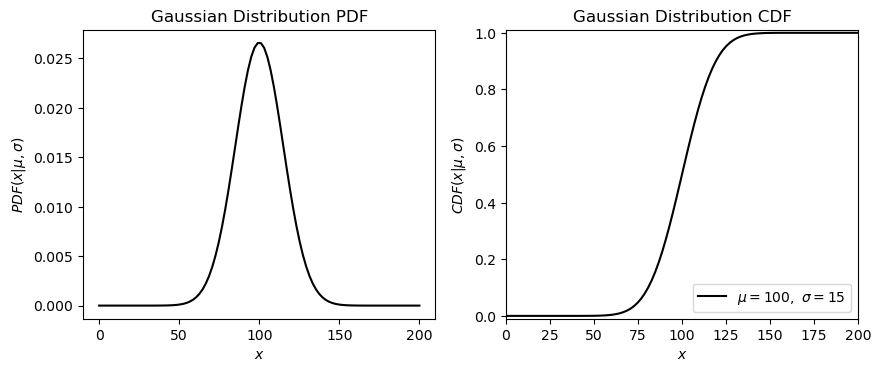

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

mu = 100
sigma = 15
distG = scipy.stats.norm(mu, sigma) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(10) # 10 random draws
p = distG.pdf(10) # pdf evaluated at x=0

print(draws)
print(p)

xgrid = np.linspace(0,200,100)
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
gaussPDF = distG.pdf(xgrid)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 3.75))
ax1.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
ax2.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
ax2.set_ylim(-0.01, 1.01)
ax1.set_xlabel('$x$'); ax2.set_xlabel('$x$')
ax1.set_ylabel(r'$PDF(x|\mu,\sigma)$'); ax2.set_ylabel(r'$CDF(x|\mu,\sigma)$')
ax1.set_title('Gaussian Distribution PDF'), ax2.set_title('Gaussian Distribution CDF')
plt.legend(loc=4)
plt.show()

In [3]:
# Confidence intervals from CDF:
upper = distG.cdf(mu+sigma)
lower = distG.cdf(mu-sigma)
p = upper-lower
print(p)

0.6826894921370859


In [7]:
# OTHER STATS:
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

data = distG.rvs(1000)
# Summary descriptive statistics for our distribution
q25, q50, q75 = np.percentile(data, [25, 50, 75])

print(f"Location: mean = {np.mean(data):.2f}, median = {np.median(data):.2f}, mode = {3*q50 - 2*np.mean(data):.2f}")
print(f"Scale: variance = {np.var(data):.2f}, standard deviation = {np.std(data):.2f}, rank-based stdev = {astroMLstats.sigmaG(data):.2f}")
print(f"Shape: skewness = {scipy.stats.skew(data):.2f}, kurtosis = {scipy.stats.kurtosis(data):.2f}")
print(f"Percentiles: 25th: {q25:.2f}, 50th: {q50:.2f}, 75th: {q75:.2f}")
print(f"50% Confidence Interval: {q75 - q25:.2f}")

Location: mean = 100.17, median = 100.38, mode = 100.80
Scale: variance = 220.34, standard deviation = 14.84, rank-based stdev = 15.28
Shape: skewness = -0.02, kurtosis = -0.21
Percentiles: 25th: 89.93, 50th: 100.38, 75th: 110.54
50% Confidence Interval: 20.61


##### What do we notice in the stat descriptors?

- mean $\simeq$ median $\simeq$ mode 
- skewness, kurtosis (defined to be zero for gaussian) $\simeq$ 0
- $50\%$ C.I. less than the $1\sigma$ region.

#### 2) Log-Normal distribution:

If $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$, the median is $\exp(\mu)$, and the mode is $\exp(\mu-\sigma^2)$.  Try it.

In [62]:
x = scipy.stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))

print(y.mean())


1.7411696288579737


1.6487212707001282 1.3586021582166188e+16


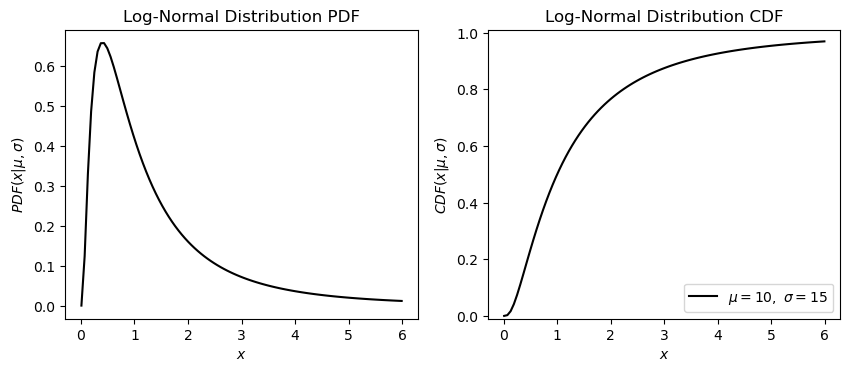

In [67]:
# Execute this cell
s = 0.954
distLN = scipy.stats.lognorm(s) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5*1), y.mean())

#xgrid = np.linspace(distLN.ppf(0.01), distLN.ppf(0.99),100)
xgrid = np.linspace(0.01,5.99,100)

# The same as above but now with the cdf method
LNPDF = distLN.pdf(xgrid)
LNCDF = distLN.cdf(xgrid)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 3.75))
ax1.plot(xgrid, LNPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
ax2.plot(xgrid, LNCDF, ls='-', c='black', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
#plt.xlim(0, 200)
ax2.set_ylim(-0.01, 1.01)
ax1.set_xlabel('$x$'); ax2.set_xlabel('$x$')
ax1.set_ylabel(r'$PDF(x|\mu,\sigma)$'); ax2.set_ylabel(r'$CDF(x|\mu,\sigma)$')
ax1.set_title('Log-Normal Distribution PDF'), ax2.set_title('Log-Normal Distribution CDF')
plt.legend(loc=4)
plt.show()


In [46]:
# OTHER STATS:
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

data = distLN.rvs(10000)
# Summary descriptive statistics for our distribution
q25, q50, q75 = np.percentile(data, [25, 50, 75])

mean = np.mean(data)
stdev = np.std(data)
# NOTE that the definition of mode is modified:
print(f"Location: mean = {mean:.2f}, median = {np.median(data):.2f}, mode = {np.exp(mean - stdev**2):.2f}")
print(f"Scale: variance = {np.var(data):.2f}, standard deviation = {np.std(data):.2f}, rank-based stdev = {astroMLstats.sigmaG(data):.2f}")
print(f"Shape: skewness = {scipy.stats.skew(data):.2f}, kurtosis = {scipy.stats.kurtosis(data):.2f}")
print(f"Percentiles: 25th: {q25:.2f}, 50th: {q50:.2f}, 75th: {q75:.2f}")
print(f"50% Confidence Interval: {q75 - q25:.2f}")

Location: mean = 0.01, median = 0.00, mode = 0.37
Scale: variance = 0.99, standard deviation = 1.00, rank-based stdev = 0.99
Shape: skewness = -0.01, kurtosis = -0.03
Percentiles: 25th: -0.65, 50th: 0.00, 75th: 0.68
50% Confidence Interval: 1.33


#### 3) $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would denotes the gamma function, which has closed-form values for integer k.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

##### Chi-squared per degree of freedom

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_\mathrm{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which (for large $k$) is distributed as

$$ p(\chi^2_\mathrm{dof}) \sim \mathscr{N}\left(1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_\mathrm{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.

#### 4) Poisson distribution

This is a distribution for a discrete variable, telling you the probability of $k$ events occuring within a certain time when the mean is $\mu$. 

An early and famous example of the use of this distribution was to **model the expected number of Prussian cavalrymen that would be kicked to death by their own horse**. Statistics has many applications...

$$ p(k|\mu) = \frac{\mu^k \exp(-\mu)}{k!} $$

where the mean $\mu$ completely characterizes the distribution. The mode is $(\mu-1)$, the standard deviation is $\sqrt{\mu}$, the skewness is $1/\sqrt{\mu}$, and the kurtosis is $1/\mu$.

As $\mu$ increases the Poisson distribution becomes more and more similar to a Gaussian with $\mathcal{N}(\mu,\sqrt{\mu})$. The Poisson distribution is sometimes called the ***law of small numbers*** or ***law of rare events***.

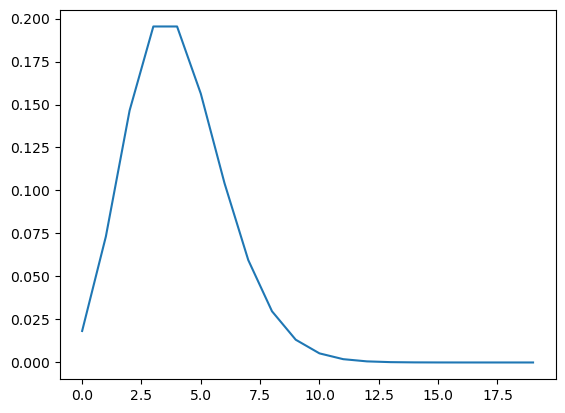

In [41]:
# Practice the Poisson distribution
mu = 10
dist = scipy.stats.poisson(mu=4)

k = dist.rvs(20) # make 20 draws
pmf = dist.pmf(6) # evaluate probability mass function at 6

k = np.arange(0,20,1)

plt.plot(k, dist.pmf(k))
plt.show()

#### 5) The Cauchy (Lorentzian) Distribution
This is a continuous distribution $$p(x| \gamma, \mu) = \frac{1}{\pi\gamma}\Bigg(\frac{\gamma^2}{\gamma^2+(x-\mu)^2}\Bigg)$$

where $\mu$ is location parameter and $\gamma$ is scale parameter. The median and mode of this distribution are equal to $\mu$. 

Because its tails decrease as slowly as $x^{−2}$ for large $|x|$, the mean, variance, standard deviation, and higher moments do not exist for this distribution. Therefore, given a set of measured $x_i$ drawn from the Cauchy distribution, the location and scale parameters cannot be estimated by computing the mean value and standard deviation using standard expressions.

However, one can always compute the mean value for a set of numbers $x_i$, but this mean value will have a large scatter around $\mu$, and this scatter will not decrease with the sample size.

#### 6) Student's $t$ Distribution

Another distribution that we'll see later is the Student's $t$ Distribution.

If you have a sample of $N$ measurements, $\{x_i\}$, drawn from a Gaussian distribution, $\mathscr{N}(\mu,\sigma)$, and you apply the transform

$$t = \frac{\overline{x}-\mu}{s/\sqrt{N}},$$

then $t$ will be distributed according to Student's $t$ with the following pdf (for $k$ degrees of freedom):

$$p(x|k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi k} \Gamma(\frac{k}{2})} \left(1+\frac{x^2}{k}\right)^{-\frac{k+1}{2}}$$

As with a Gaussian, Student's $t$ is bell shaped, but has "heavier" tails.

Note the similarity between $t$ and $z$ for a Gaussian (as defined in the $\chi^2$ section above), which reflects the difference between data-derived estimates of the mean and standard deviation and their true values.

In fact, although often approximated as a Gaussian distribution, the mean of a sample actually follows a Student's $t$ distribution. This matters when sample sizes are small, but mostly irrelevant for "Big Data" examples.

## What's the point of all these distributions?

* There are many other distributions that we haven't covered here (see the textbook).

* The point is that we are going to make some measurement. 

* To understand the significance of our measurement, we want to know how likely it is that we would get that measurement in our experiment by random chance. 

* To determine that we need to know the shape of the distribution. Let's say that we find that $x=6$. If our data is $\chi^2$ distributed with 2 degrees of freedom, then we would integrate the $k=2$ curve above from 6 to $\infty$ to determine how likely it is that we would have gotten 6 or larger by chance.  If our distribution was instead $t$ distributed, we would get a *very* different answer.  

Note that it is important that you decide *ahead of time* what the metric will be for deciding whether this result is significant or not.  More on this later, but see [this article](http://fivethirtyeight.com/features/science-isnt-broken/).

## The Central Limit Theorem <a class="anchor" id="one"></a>

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**:

> For an arbitrary distribution, $h(x)$, with a well-defined mean, $\mu$, and standard deviation, $\sigma$ (i.e., tails should fall off faster than $1/x^2$) the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathcal{N}(\mu,\sigma/\sqrt{N})$. (A Cauchy distribution is one example where this fails.)

This theorem is the foundation for performing repeat measurements in order to improve the accuracy of one's experiment. This is truly amazing! No matter what distribution you start off with (provided it has a well defined mean and standard deviation) or the measurement process itself, repeated batches of $N$ draws will follow a Gaussian centered around the mean.  

The **Weak Law of Large Numbers** (aka **Bernoulli's Theorem**) further says that the sample mean will converge to the distribution mean as $N$ increases.


Let's wrap our heads around what this means with some examples. 

**Try this with some GW posterior**